In [5]:
from	tensorflow.keras.datasets	import	mnist
 #	Load	MNIST	dataset
(x_train,y_train),	(x_test,y_test)	= mnist.load_data()

In [7]:
mnist

<module 'keras.api.datasets.mnist' from 'C:\\Users\\Admin\\AppData\\Roaming\\Python\\Python312\\site-packages\\keras\\api\\datasets\\mnist\\__init__.py'>

In [11]:
image_index	=	9	#	You	can	change	this	index	to	any	number	from	0	to	len(x_test)-1
selected_image	=	x_test[image_index]		#	This	gives	you	the	28x28	image
true_label	=	y_test[image_index]		#	This	gives	you	the	true	label	for	the	selected	image

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


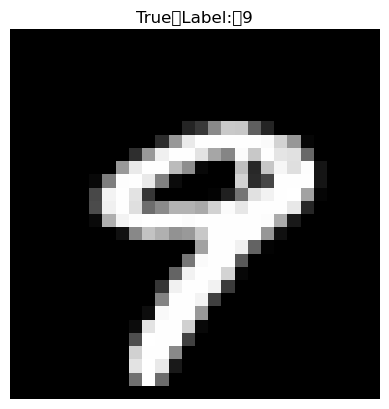

In [15]:
import	matplotlib.pyplot	as	plt
 #	Display	the	selected	image
plt.imshow(selected_image,	cmap='gray')		#	Display	image	in	grayscale
plt.title(f"True	Label:	{true_label}")		#	Add	the	true	label	as	the	title
plt.axis('off')		#	Hide	axes
plt.show()

In [19]:
from	PIL	import	Image
 #	Save	the	selected	image	as	a	PNG	file
image_path	=	'selected_image.png'
image	=	Image.fromarray(selected_image)		#	Convert	the	NumPy	array	to	a	PIL	Image
image.save(image_path)		#	Save	the	image	as	a	PNG	file
print(f"Image	saved	at:	{image_path}")

Image	saved	at:	selected_image.png


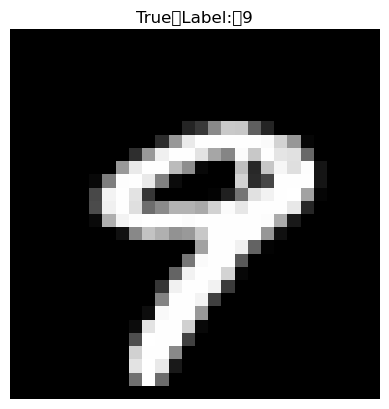

In [21]:
#	Reload	and	display	the	saved	image
saved_image	=	Image.open('selected_image.png')
plt.imshow(saved_image,	cmap='gray')
plt.title(f"True	Label:	{true_label}")
plt.axis('off')
plt.show()


In [23]:
from	tensorflow.keras.models	import	Sequential
from	tensorflow.keras.layers	import	Conv2D,	MaxPooling2D,	Flatten,	Dense
from	tensorflow.keras.datasets	import	mnist
from	tensorflow.keras.utils	import	to_categorical
 #	Step	1:	Load	the	MNIST	dataset
(x_train,	y_train),	(x_test,	y_test)	=	mnist.load_data()
 #	Step	2:	Preprocess	the	data
x_train	=	x_train.reshape(x_train.shape[0],	28,	28,	1)		#	Reshape	to	(28,	28,	1)
x_test	=	x_test.reshape(x_test.shape[0],	28,	28,	1)		#	Reshape	to	(28,	28,	1)
x_train	=	x_train.astype('float32')		#	Convert	to	float32
x_test	=	x_test.astype('float32')
 #	Normalize	the	data	(scale	to	0-1	range)
x_train	/=	255.0
x_test	/=	255.0
 #	Convert	labels	to	one-hot	encoding
y_train	=	to_categorical(y_train,	10)
y_test	=	to_categorical(y_test,	10)
 #	Step	3:	Define	the	CNN	model
cnn_model	=	Sequential([
Conv2D(32,	(3,	3),	activation='relu',	input_shape=(28,	28,	1)),
MaxPooling2D((2,	2)),
Conv2D(64,	(3,	3),	activation='relu'),
MaxPooling2D((2,	2)),
Flatten(),
Dense(64,	activation='relu'),
Dense(10,	activation='softmax')		#	Output	layer	with	10	classes	(digits	0-9)
])
 #	Step	4:	Compile	the	model
cnn_model.compile(optimizer='adam',	loss='categorical_crossentropy',	metrics=['accuracy'])
 #	Step	5:	Train	the	model
cnn_model.fit(x_train,	y_train,	epochs=5,	batch_size=64,	validation_data=(x_test,	y_test))
 #	Save	the	trained	model	(optional,	to	load	later)
cnn_model.save('cnn_mnist_model.h5')

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.8896 - loss: 0.3770 - val_accuracy: 0.9823 - val_loss: 0.0541
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9828 - loss: 0.0563 - val_accuracy: 0.9875 - val_loss: 0.0352
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9883 - loss: 0.0391 - val_accuracy: 0.9905 - val_loss: 0.0294
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9894 - val_loss: 0.0313
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9906 - val_loss: 0.0267


NameError: name 'predicted_label' is not defined

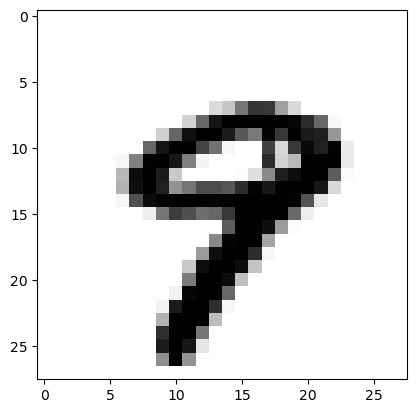

In [45]:
import	numpy	as	np
from	PIL	import	Image
import	matplotlib.pyplot	as	plt
def	predict_custom_image(image_path,cnn_model):
 """
 Predicts	the	digit	for	a	custom	image	provided	by	the	user.
 """
 #	Step	1:	Load	the	saved	PNG	image	and	convert	to	grayscale
 image	=	Image.open(image_path).convert('L')		#	Convert	to	grayscale	(L	mode)
 #	Step	2:	Resize	the	image	to	28x28	pixels	(standard	MNIST	size)
 image	=	image.resize((28,	28))
 #	Step	3:	Convert	the	image	to	a	numpy	array
 image_array	=	np.array(image)
 #	Step	4:	Invert	the	colors	(MNIST	images	are	white	on	black,	so	we	invert	it	to	black	on	white)
 image_array	=	255	-	image_array
 #	Step	5:	Normalize	the	image	(scale	pixel	values	to	[0,	1])
 image_array	=	image_array	/	255.0
 #	Step	7:	Predict	the	digit	using	the	CNN	model
 predicted_probs	=	cnn_model.predict(image_array)
 #	Step	6:	Reshape	the	image	to	fit	the	input	shape	of	the	CNN	model	(28x28x1)
 image_array	=	image_array.reshape(1,	28,	28,	1)		#	Reshape	to	(1,	28,	28,	1)
 #	Get	the	predicted	label	(the	digit	with	the	highest	probability)
 predicted_label =	np.argmax(predicted_probs)
 #	Step	8:	Display	the	image	and	the	predicted	label
plt.imshow(image_array.reshape(28,	28),cmap='gray')
plt.title(f"predicted label:{predicted_label}")
plt.axis('off')		#	Hide	the	axes
plt.show()
return	predicted_label
 #	Example	Usage:	Use	the	saved	image	(e.g.,	'selected_image.png')	and	predict
predict_custom_image('selected_image.png',	cnn_model)